<a href="https://colab.research.google.com/github/yeop6033/datamining/blob/main/titanic_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

목표 : 랜덤포레스트사용하여 생존예측하기!

In [1]:
import pandas as pd
import numpy as np

알아두면 꿀팁
코렙에서 from google.colab import files 사용시 파일을 바로 가져올수 있습니다

In [2]:
from google.colab import files
testdata = files.upload()
traindata = files.upload()
genderdata=files.upload()

Saving test.csv to test.csv


Saving train.csv to train.csv


Saving gender_submission.csv to gender_submission.csv


In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("gender_submission.csv")

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


시각화 패키지 : plotly,chart_studio <-- 최근에 더 세련된 데이터 시각화 패키지 \
머신러닝 분석 : sklearn

In [8]:
 !pip install plotly
 !pip install cufflinks
 !pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 


In [9]:
import pandas as pd   ##판다스 프로그램 
import numpy as np    ##넘파이
import matplotlib.pyplot as plt ## 그래프사용 원래 우리가 쓰던 matplot
import chart_studio.plotly as py ###요번에 사용할려고 한 그래프 cahrt_studio
import cufflinks as cf          
cf.go_offline(connected=True) #####plotly 툴

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<데이터 전처리>

In [46]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Age            891 non-null    float64
 3   Fare           891 non-null    float64
 4   Sex_female     891 non-null    uint8  
 5   Sex_male       891 non-null    uint8  
 6   Embarked_C     891 non-null    uint8  
 7   Embarked_Q     891 non-null    uint8  
 8   Embarked_S     891 non-null    uint8  
 9   title_Master   891 non-null    uint8  
 10  title_Miss     891 non-null    uint8  
 11  title_Mr       891 non-null    uint8  
 12  title_Mrs      891 non-null    uint8  
 13  title_Officer  891 non-null    uint8  
 14  title_Royalty  891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(11)
memory usage: 37.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns 

알아두기 데이터 정리할때 .sort_values 쓰게 되면 데이터 값은 오름 차순 정렬, 결측치가 있으면 맨마지막에 위치하게됨

In [11]:
train.dtypes.sort_values()

PassengerId      int64
Survived         int64
Pclass           int64
SibSp            int64
Parch            int64
Age            float64
Fare           float64
Name            object
Sex             object
Ticket          object
Cabin           object
Embarked        object
dtype: object

먼저 객체로 되어있는것을 확인하여 데이터 분석 시작!

In [12]:
train.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


#train결측여부 확인 .isnull()
결측치 확인\
1.Cabin 방 \
2.Embarked 선실\
3.Age 나이\
4.Fare 요금

In [13]:
#True는 1 False는 0 임으로 0보다 큰수를 전부 더하면 결측치가 몇개있는지 확인
train.isnull().sum()[train.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [14]:
test.isnull().sum()[test.isnull().sum()>0]

Age       86
Fare       1
Cabin    327
dtype: int64

**데이터 가공시 함부로 데이터를 삭제하거나 변경하면 안됨으로 결측치를 unknown으로 변경\

결측값 대체하기 .fillna

In [15]:
train['Cabin']=train['Cabin'].fillna("unknown") #unknown
test['Cabin']=test['Cabin'].fillna("unknown") #unknown

In [16]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0]) #최빈값

In [17]:
test.Fare=test.Fare.fillna(train.Fare.mean())

데이터 변형 메소드
###.apply(lambda X) -> 특정한 열에 사용하는 함수

In [18]:
train['title']=train['Name'].apply(lambda x: x.split('.')[0].split(',')[1].strip())
test['title']=test['Name'].apply(lambda x: x.split('.')[0].split(',')[1].strip())

In [ ]:
# train['title']

In [ ]:
# test['title']

.groupby([특정값,특정값]) 모아서 보여줌

In [19]:
train.groupby(['title','Sex']).Age.mean()

title         Sex   
Capt          male      70.000000
Col           male      58.000000
Don           male      40.000000
Dr            female    49.000000
              male      40.600000
Jonkheer      male      38.000000
Lady          female    48.000000
Major         male      48.500000
Master        male       4.574167
Miss          female    21.773973
Mlle          female    24.000000
Mme           female    24.000000
Mr            male      32.368090
Mrs           female    35.898148
Ms            female    28.000000
Rev           male      43.166667
Sir           male      49.000000
the Countess  female    33.000000
Name: Age, dtype: float64

In [21]:
test.groupby(['title','Sex']).Age.mean()

title   Sex   
Col     male      50.000000
Dona    female    39.000000
Dr      male      53.000000
Master  male       7.406471
Miss    female    21.774844
Mr      male      32.000000
Mrs     female    38.903226
Ms      female          NaN
Rev     male      35.500000
Name: Age, dtype: float64

이름에 대해 확인 이름을 정리해주어야 데이터 분석이 더욱 편하게 할 수 있음

In [22]:
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

train['title']=train['title'].map(newtitles)
test['title']=test['title'].map(newtitles)

In [23]:
train.groupby(['title','Sex']).Age.mean()

title    Sex   
Master   male       4.574167
Miss     female    21.804054
Mr       male      32.368090
Mrs      female    35.718182
Officer  female    49.000000
         male      46.562500
Royalty  female    40.500000
         male      42.333333
Name: Age, dtype: float64

#이름에 다하여 값을 정리히여 숫자로 변경하는 함수를 생성 해준다 
--> 이유 데이터 분석을 할때 숫자로 변경해주어야 수치로 데이터 파일을 판단할 수 있어서

In [24]:
def newage (cols):
    title=cols[0]
    Sex=cols[1]
    Age=cols[2]
    if pd.isnull(Age):
        if title=='Master' and Sex=="male":
            return 4.57
        elif title=='Miss' and Sex=='female':
            return 21.8
        elif title=='Mr' and Sex=='male': 
            return 32.37
        elif title=='Mrs' and Sex=='female':
            return 35.72
        elif title=='Officer' and Sex=='female':
            return 49
        elif title=='Officer' and Sex=='male':
            return 46.56
        elif title=='Royalty' and Sex=='female':
            return 40.50
        else:
            return 42.33
    else:
        return Age 

In [25]:
train.Age=train[['title','Sex','Age']].apply(newage, axis=1)
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

In [26]:
test.Age=test[['title','Sex','Age']].apply(newage, axis=1)
test.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

In [27]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

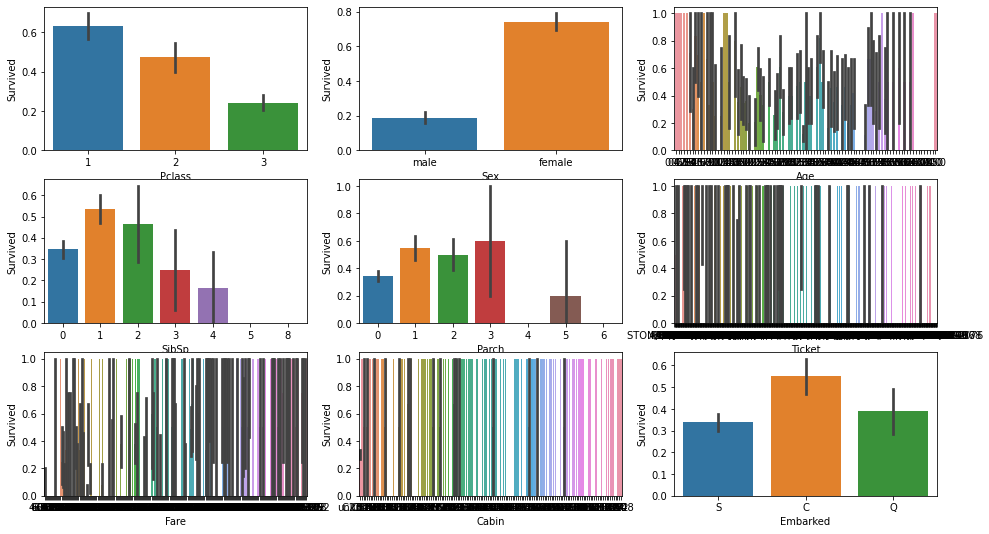

In [28]:
import seaborn as sns
plt.figure(figsize=[16,9])

index=['Pclass', 'Sex', 'Age', 'SibSp','Parch','Ticket','Fare','Cabin', 'Embarked']

for i,n in zip(range(1,10,1),index):
    plt.subplot(3,3,i)
    sns.barplot(n,'Survived',data=train)
    plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



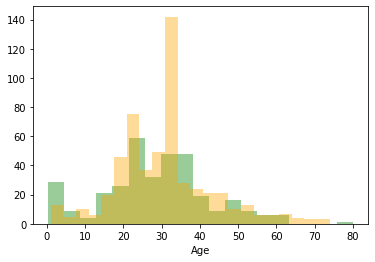

In [29]:
sns.distplot(train[train.Survived==1].Age, color='green', kde=False)
sns.distplot(train[train.Survived==0].Age, color='orange', kde=False)

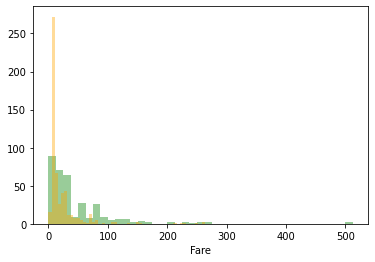

In [30]:
sns.distplot(train[train.Survived==1].Fare, color='green', kde=False)
sns.distplot(train[train.Survived==0].Fare, color='orange', kde=False)

.drop을 사용하여 사용하였거나 필요없는 것들을 제거 해줌

아래 오류는 이미 작업하여 삭제된 파일을 한번더 실행하여 없는 데이터를 다시 삭제할려고 하여 오류가남 제대로 작업됨

In [32]:
train.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin'],axis=1, inplace=True)
test.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin'],axis=1, inplace=True)
# titanic=pd.concat([train, test], sort=False)
# train.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin'],axis=1)

KeyError: ignored

In [33]:
test=pd.get_dummies(test)

In [35]:
train=pd.get_dummies(train)

In [36]:
test.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
0,3,34.5,7.8292,0,1,0,1,0,0,0,1,0,0,0
1,3,47.0,7.0000,1,0,0,0,1,0,0,0,1,0,0
2,2,62.0,9.6875,0,1,0,1,0,0,0,1,0,0,0
3,3,27.0,8.6625,0,1,0,0,1,0,0,1,0,0,0
4,3,22.0,12.2875,1,0,0,0,1,0,0,0,1,0,0


In [37]:
train.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
0,0,3,22.0,7.2500,0,1,0,0,1,0,0,1,0,0,0
1,1,1,38.0,71.2833,1,0,1,0,0,0,0,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,0,1,0,1,0,0,0,0
3,1,1,35.0,53.1000,1,0,0,0,1,0,0,0,1,0,0
4,0,3,35.0,8.0500,0,1,0,0,1,0,0,1,0,0,0


In [38]:
train.Survived=train.Survived.astype('int')
train.Survived.dtype

dtype('int64')

In [39]:
xtrain=train.drop("Survived",axis=1)
ytrain=train['Survived']
xtest=test

랜덤 포레스트 사용하여 데이터 예측 시작!

In [40]:
from sklearn.ensemble import RandomForestClassifier ## 랜덤포레스트 모델
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

RF=RandomForestClassifier(random_state=1)
PRF=[{'n_estimators':[10,100],'max_depth':[3,6],'criterion':['gini','entropy']}]
GSRF=GridSearchCV(estimator=RF, param_grid=PRF, scoring='accuracy',cv=2)
scores_rf=cross_val_score(GSRF,xtrain,ytrain,scoring='accuracy',cv=5)
np.mean(scores_rf)

0.8204318624066286

In [41]:
#RandomForest
rf_model=RF.fit(xtrain, ytrain)
rf_pred = rf_model.predict(xtest)

In [43]:
test_submit=pd.read_csv('test.csv',dtype={'Pclass':str})
test_submit.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
output=pd.DataFrame({'PassengerId':test_submit['PassengerId'],'Survived':rf_pred})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [45]:
output.to_csv('submission.csv', index=False)

# 레이블 인코딩
문자열(object)칼럼 피처를 숫자형으로 변환\
def format_features(df):\
    df['Cabin'] =df['Cabin'].str[0]\
    features = ['Cabin','Sex','Embarked']\
    for feature in features:\
        le = LabelEncoder() # 선언\
        le = le.fit(df[feature])\
        피처에 대한 데이터프레임으로  인코딩생성
        df[feature] = le.transform(df[feature]) # 피처에 인코딩한것으로 변환\

In [ ]:
def format_features(df):
    df['Cabin'] =df['Cabin'].str[0]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder() # 선언
        le = le.fit(df[feature]) # 피처에 대한 데이터프레임으로 인코딩생성
        df[feature] = le.transform(df[feature]) # 피처에 인코딩한것으로 변환
        
    return df